1 - **  Preliminary steps**


In [ ]:
!python --version

Python 3.8.3


In [1]:
import csv

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Iris
Iris is a particularly famous toy dataset (i.e.<br>a dataset with a small number of rows and columns, mostly
used for initial small-scale tests and proofs of concept).<br> This specific dataset contains information about
the Iris, a genus that includes 260-300 species of plants (you can read more about Iris on Wikipedia).<br>The
Iris dataset contains measurements for 150 Iris flowers, each belonging to one of three species:
- Virginica,
- Versicolor and 
- Setosa.<br>

(50 flowers for each of the three species).<br>These three species all present similar
flowers, as you can see in Figure 1.
Each of the 150 flowers contained in the Iris dataset is represented by 5 values:  
• sepal length, in cm  
• sepal width, in cm  
• petal length, in cm  
• petal width, in cm  
• Iris species, one of: Iris-setosa, Iris-versicolor, Iris-virginica  


Each row of the dataset represents a distinct flower (as such, the dataset will have 150 rows).  Each
row then contains 5 values (4 measurements and a species label).

In [3]:
! pip install wget

  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=3f0b945d02ac430596615f81d3e97306a88e0515189e43a818ce100af3641f00
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget
help(wget)

In [5]:
! python -m wget "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data" -o iris.csv


Saved under iris.csv


In the following function we read the csv file and save it as a list of rows.

In [6]:
input_file = "iris.csv"
iris_data = []
with open(input_file, "r") as file:
    reader = csv.reader(file, delimiter = ",")
    for row in reader:
        iris_data.append(row)
len(iris_data)

151

__2.1 Iris dataset__  
1. Load the previously downloaded Iris dataset as a list of lists (each of the 150 lists should have
5 elements).  You can make use of the csv module presented.  You can read more about the csv
module on the official documentation.  
2. Compute and print the mean and the standard deviation for each of the 4 measurement columns  
(i.e. sepal length and width, petal length and width).   

![title](https://github.com/rehman-official/DSLabs/blob/main/Lab1/mean_sd.png?raw=1)



In [7]:
# data is already saved as list of lists
# iris_data
# lets compute the mean:

sepal_len, sepal_wid, petal_len, petal_wid = 0,0,0,0
for row in iris_data:
    vals = [float(x) for x in row[:-1]]
    sepal_len += vals[0]
    sepal_wid += vals[1]
    petal_len += vals[2]
    petal_wid += vals[3]

n = len(data)


sepal_len_mean = sepal_len/n
sepal_wid_mean = sepal_wid/n
petal_len_mean = petal_len/n
petal_wid_mean = petal_wid/n

means = f"""Mean values:
sepal_len: {sepal_len_mean:.2f}
sepal_wid: {sepal_wid_mean:.2f}
petal_len: {petal_len_mean:.2f}
petal_wid: {petal_wid_mean:.2f}"""
print(means)
    

IndexError: ignored

In [ ]:
# for standard deviation we will use the mean computed above
sepal_len, sepal_wid, petal_len, petal_wid = 0,0,0,0
for row in iris_data:
    vals = [float(x) for x in row[:-1]]
    sepal_len += (vals[0] - sepal_len_mean)**2
    sepal_wid += (vals[1] - sepal_wid_mean)**2
    petal_len += (vals[2] - petal_len_mean)**2
    petal_wid += (vals[3] - petal_wid_mean)**2

sepal_len_sd = np.sqrt(sepal_len/n)
sepal_wid_sd = np.sqrt(sepal_wid/n)
petal_len_sd = np.sqrt(petal_len/n)
petal_wid_sd = np.sqrt(petal_wid/n)

standard_deviations = f"""Standard Deviation values:
sepal_len: {sepal_len_sd:.2f}
sepal_wid: {sepal_wid_sd:.2f}
petal_len: {petal_len_sd:.2f}
petal_wid: {petal_wid_sd:.2f}"""
print(standard_deviations)

Standard Deviation values:
sepal_len: 0.83
sepal_wid: 0.43
petal_len: 1.76
petal_wid: 0.76


In [ ]:
# let's check the answers with numpy
# first convert data in float form
iris_data_float = [[float(row[0]), float(row[1]), float(row[2]), float(row[3])] for row in iris_data]
iris_data_array = np.array(iris_data_float, dtype = float, )

sepal_len_mean = np.mean(iris_data_array[:,0])
sepal_wid_mean = np.mean(iris_data_array[:,1])
petal_len_mean = np.mean(iris_data_array[:,2])
petal_wid_mean = np.mean(iris_data_array[:,3])

means = f"""Mean values:
sepal_len: {sepal_len_mean:.2f}
sepal_wid: {sepal_wid_mean:.2f}
petal_len: {petal_len_mean:.2f}
petal_wid: {petal_wid_mean:.2f}"""
print(means)
    

Mean values:
sepal_len: 5.84
sepal_wid: 3.05
petal_len: 3.76
petal_wid: 1.20


In [ ]:
# and finally Standard Deviation from numpy array
sepal_len_sd = np.std(iris_data_array, axis = 0) # with axis command we ask it to compute sd of all columns
sepal_len_sd ,sepal_wid_sd ,petal_len_sd ,petal_wid_sd = sepal_len_sd


standard_deviations = f"""Standard Deviation values:
sepal_len: {sepal_len_sd:.2f}
sepal_wid: {sepal_wid_sd:.2f}
petal_len: {petal_len_sd:.2f}
petal_wid: {petal_wid_sd:.2f}"""
print(standard_deviations)

Standard Deviation values:
sepal_len: 0.83
sepal_wid: 0.43
petal_len: 1.76
petal_wid: 0.76


3. Compute and print the mean and the standard deviation for each of the 4 measurement columns,  
separately for each of the three Iris species (versicolor, virginica and setosa).

In [ ]:
# we can add if-else to our code to find meand and standard deviation via for loop
# or we can use pandas


In [ ]:
columns = ["sepal_len" ,"sepal_wid" ,"petal_len" ,"petal_wid", "flower_name"]
iris_df = pd.DataFrame(data = iris_data, columns= columns)
iris_df.head()

,sepal_len,sepal_wid,petal_len,petal_wid,flower_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_df.dtypes

sepal_len      object
sepal_wid      object
petal_len      object
petal_wid      object
flower_name    object
dtype: object

Data is in string format, we need to convert it to floating point to use aggregating methods.

In [ ]:
? iris_df.astype

Signature:  iris_df.astype(dtype, copy: bool = True, errors: str = 'raise') -> ~FrameOrSeries
Docstring:
Cast a pandas object to a specified dtype ``dtype``.

Parameters
----------
dtype : data type, or dict of column name -> data type
    Use a numpy.dtype or Python type to cast entire pandas object to
    the same type. Alternatively, use {col: dtype, ...}, where col is a
    column label and dtype is a numpy.dtype or Python type to cast one
    or more of the DataFrame's columns to column-specific types.
copy : bool, default True
    Return a copy when ``copy=True`` (be very careful setting
    ``copy=False`` as changes to values then may propagate to other
    pandas objects).
errors : {'raise', 'ignore'}, default 'raise'
    Control raising of exceptions on invalid data for provided dtype.

    - ``raise`` : allow exceptions to be raised
    - ``ignore`` : suppress exceptions. On error return original object.

Returns
-------
casted : same type as caller

See Also
--------
to_date

In [ ]:
float_cast = {x: float for x in columns[:-1]}
df_iris = iris_df.astype(float_cast)
df_iris.dtypes

sepal_len      float64
sepal_wid      float64
petal_len      float64
petal_wid      float64
flower_name     object
dtype: object

In [ ]:
df_iris.describe()

,sepal_len,sepal_wid,petal_len,petal_wid
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
gb_species_name = df_iris.groupby("species_name")
gb_species_name.size()

flower_name
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
gb_species_name.mean()

,sepal_len,sepal_wid,petal_len,petal_wid
flower_name,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [ ]:
gb_species_name.std()

,sepal_len,sepal_wid,petal_len,petal_wid
flower_name,,,,
Iris-setosa,0.352490,0.381024,0.173511,0.107210
Iris-versicolor,0.516171,0.313798,0.469911,0.197753
Iris-virginica,0.635880,0.322497,0.551895,0.274650


### or we can specify numpy methods to be performed upon our group by object

In [ ]:
gb_species_name.agg([np.mean, np.std])

sepal_len           sepal_wid           petal_len            \
                     mean       std      mean       std      mean       std   
flower_name                                                                   
Iris-setosa         5.006  0.352490     3.418  0.381024     1.464  0.173511   
Iris-versicolor     5.936  0.516171     2.770  0.313798     4.260  0.469911   
Iris-virginica      6.588  0.635880     2.974  0.322497     5.552  0.551895   

                petal_wid            
                     mean       std  
flower_name                          
Iris-setosa         0.244  0.107210  
Iris-versicolor     1.326  0.197753  
Iris-virginica      2.026  0.274650

In [ ]:
groups = list(gb_flower_name.groups.keys())
groups

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

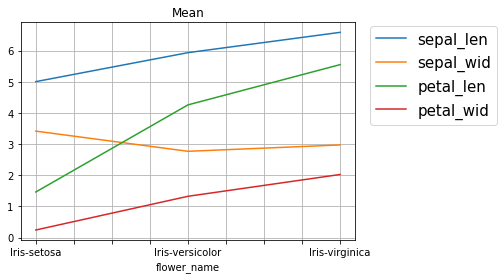

In [ ]:
gb_species_name.mean().plot(grid = True, title = "Mean")
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1.02), fontsize = 15);

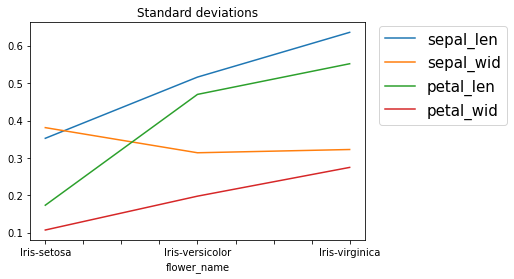

In [ ]:
gb_species_name.agg(np.std).plot()
plt.title("Standard deviations")
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1.02), fontsize = 15);

## Citybik.es
Citybik.es is a website that offers an Application Programming Interface (or API, for short) for the usage of
bike-sharing services throughout the world.<br>Among the others, data for one of Turin’s bike sharing system
([TO]Bike) is available.<br>For [TO]Bike, the information available is at a “station” granularity.<br>This means
that all the data available regards the bike stations: some of the useful information available is the station
name, its position (in terms of latitude and longitude), the number of available bikes and the number of
free docks.<br>The data is offered in near real-time (i.e.<br>it is updated every 15-30 minutes).
The API endpoint to request the data about for the [TO]Bike service is the following:
http://api.citybik.es/v2/networks/to-bike
You can either download the data from your browser, or using wget (as shown for the Iris dataset).
This dataset is in the JSON (JavaScript Object Notation) format.<br>This format allows storing complex data structure  (i.e.<br>not only tabular data).<br>You can either store basic data types  (strings, numbers, boolean)  or lists of them (e.g.<br>[0, true, "test"])  and dictionaries  (e.g.<br>{ "key1": "value1",
"key2": false, "key3": [3, 2, 1]}).

In [ ]:
#! python -m wget "http://api.citybik.es/v2/networks/to-bike" -o "tobike.json"


Saved under tobike.json


In [ ]:
import json
help(json)

Help on package json:

NAME
    json

MODULE REFERENCE
    https://docs.python.org/3.8/library/json
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
    JSON (JavaScript Object Notation) <http://json.org> is a subset of
    JavaScript syntax (ECMA-262 3rd edition) used as a lightweight data
    interchange format.
    
    :mod:`json` exposes an API familiar to users of the standard library
    :mod:`marshal` and :mod:`pickle` modules.  It is derived from a
    version of the externally maintained simplejson library.
    
    Encoding basic Python object hierarchies::
    
        >>> import json
        >>> json.dumps(['foo', {'bar': ('baz', None, 1.0, 2)}])
        '["foo", {"bar": ["baz", null, 1.0,

In [ ]:
with open("tobike.json", "r") as file:
    data = json.load(file)

print(data)

{'network': {'company': ['Comunicare S.r.l.'], 'href': '/v2/networks/to-bike', 'id': 'to-bike', 'location': {'city': 'Torino', 'country': 'IT', 'latitude': 45.07098200000001, 'longitude': 7.685676}, 'name': '[TO]BIKE', 'source': 'http://www.tobike.it/frmLeStazioni.aspx?ID=22', 'stations': [{'empty_slots': 0, 'extra': {'number': 2, 'reviews': 1671, 'score': 4.6, 'status': 'online', 'uid': '251'}, 'free_bikes': 0, 'id': '15af4cdd63c01ecaf5851e36c8faf608', 'latitude': 45.082462, 'longitude': 7.695677, 'name': 'Bologna', 'timestamp': '2020-10-11T16:55:41.761000Z'}, {'empty_slots': 14, 'extra': {'number': 3, 'reviews': 351, 'score': 3.3, 'status': 'online', 'uid': '252'}, 'free_bikes': 1, 'id': '248d4542158dc35ace927f698f059a14', 'latitude': 45.073442, 'longitude': 7.668313, 'name': 'Porta Susa 2', 'timestamp': '2020-10-11T16:55:41.761000Z'}, {'empty_slots': 13, 'extra': {'number': 4, 'reviews': 338, 'score': 3.9, 'status': 'online', 'uid': '253'}, 'free_bikes': 0, 'id': '9f705b5e090de99e97

In [ ]:
type(data)

dict

In [ ]:
from pprint import pprint
pprint(data, indent= 4)

{   'network': {   'company': ['Comunicare S.r.l.'],
                   'href': '/v2/networks/to-bike',
                   'id': 'to-bike',
                   'location': {   'city': 'Torino',
                                   'country': 'IT',
                                   'latitude': 45.07098200000001,
                                   'longitude': 7.685676},
                   'name': '[TO]BIKE',
                   'source': 'http://www.tobike.it/frmLeStazioni.aspx?ID=22',
                   'stations': [   {   'empty_slots': 0,
                                       'extra': {   'number': 2,
                                                    'reviews': 1671,
                                                    'score': 4.6,
                                                    'status': 'online',
                                                    'uid': '251'},
                                       'free_bikes': 0,
                                       'id': '15af4cdd63c01ec

In [ ]:
stations = data["network"]["stations"]
# a list of dicts
pprint(stations, indent = 4)

NameError: name 'pprint' is not defined

### Count and print the number of active stations  
(a station is active if its extra.status field is "online").

In [ ]:
active_stations = map(lambda x: x['extra']['status'] == 'online', stations)
sum(active_stations)

112

### Count and print the total number of bikes available (field free_bikes) and the number of free docks (field empty_slots) throughout all stations.


In [ ]:
# same as previously
free_bikes = map(lambda x: x['free_bikes'], stations)
empty_slots = map(lambda x: x['empty_slots'], stations)

sum(free_bikes) , sum(empty_slots)

(171, 674)

__Given the coordinates (latitude, longitude) of a point (e.g. 45.074512, 7.694419),<br>identify the closest bike station to it that has available bikes.__ <br>
For computing the distance among two points
(given their coordinates), you can use the function distance_coords() defined in the code snippet
below (which is an implementation of the great-circle distance):


In [ ]:
#from math import cos, acos, sin
from numpy import cos, arccos as acos, sin
def distance_coords(lat1, lng1, lat2, lng2):
    """Compute the distance among two points."""
    deg2rad = lambda x: x * 3.141592 / 180
    lat1, lng1, lat2, lng2 = map(deg2rad, [ lat1, lng1, lat2, lng2 ])
    R = 6378100 # Radius of the Earth, in meters
    return R * acos(sin(lat1) * sin(lat2) + cos(lat1) * cos(lat2) * cos(lng1 - lng2))


In [ ]:
 latitude, longitude = (45.074512, 7.694419)
 # first we get a list of all online stations with atleast one bike available
 stations_with_bikes = [s for s in stations if s['extra']['status'] == 'online' and s["free_bikes"] > 0]
# now we compute the compute the distance of each station from given point and store it in a dict
distance_from_point = {
    i: distance_coords(latitude, longitude, s['latitude'],  s['longitude'])  for i, s in enumerate(stations_with_bikes)
    }
#pprint(distance_from_point, indent= 2)
idx, dist = min(distance_from_point.items(), key = lambda x: x[1])
nearest_station = stations_with_bikes[idx]

result = f"""
the nearest station for given coordinates { (latitude, longitude)} is
name: {nearest_station["name"]}
coordinates: {nearest_station["latitude"], nearest_station["longitude"]}
free bikes: {nearest_station["free_bikes"]}
distance: {dist:.2f} m
"""
print(result)


the nearest station for given coordinates (45.074512, 7.694419) is
name: Regio Parco
coordinates: (45.076832, 7.694134)
free bikes: 3
distance: 259.23 m



## there is a better way to read all this data!

In [ ]:
df = pd.DataFrame(data = stations)

In [ ]:
df.head()

,empty_slots,extra,free_bikes,id,latitude,longitude,name,timestamp
0,0,"{'number': 2, 'reviews': 1671, 'score': 4.6, '...",0,15af4cdd63c01ecaf5851e36c8faf608,45.082462,7.695677,Bologna,2020-10-11T16:55:41.761000Z
1,14,"{'number': 3, 'reviews': 351, 'score': 3.3, 's...",1,248d4542158dc35ace927f698f059a14,45.073442,7.668313,Porta Susa 2,2020-10-11T16:55:41.761000Z
2,13,"{'number': 4, 'reviews': 338, 'score': 3.9, 's...",0,9f705b5e090de99e976f4ac6c6911571,45.072882,7.667951,Porta Susa 1,2020-10-11T16:55:41.761000Z
3,14,"{'number': 5, 'reviews': 221, 'score': 3.4, 's...",0,53a856e2cd42e9bfbc022f6cdc6d2e1c,45.072642,7.670337,Cernaia,2020-10-11T16:55:41.761000Z
4,3,"{'number': 6, 'reviews': 217, 'score': 3.5, 's...",3,2bf7fcbcdd03427d49d057a3f4d4b378,45.075438,7.673785,Valdocco 2,2020-10-11T16:55:41.761000Z


### wowlaah!

In [ ]:
#df.to_csv("stations.csv", sep = ";")

Count and print the number of active stations  
(a station is active if its extra.status field is "online").

In [ ]:
pd.set_option("max_colwidth", 200)
x = df.extra[0]
x.get("status")

'online'

In [ ]:
# lets filter these rows
filt = df["extra"].apply(lambda x: x["status"] == "online")
active_stations = df[filt].shape[0]
active_stations

112

In [ ]:
df[["free_bikes", "empty_slots"]].sum()


free_bikes     171
empty_slots    674
dtype: int64

In [ ]:
? df.assign

Signature:  df.assign(**kwargs) -> 'DataFrame'
Docstring:
Assign new columns to a DataFrame.

Returns a new object with all original columns in addition to new ones.
Existing columns that are re-assigned will be overwritten.

Parameters
----------
**kwargs : dict of {str: callable or Series}
    The column names are keywords. If the values are
    callable, they are computed on the DataFrame and
    assigned to the new columns. The callable must not
    change input DataFrame (though pandas doesn't check it).
    If the values are not callable, (e.g. a Series, scalar, or array),
    they are simply assigned.

Returns
-------
DataFrame
    A new DataFrame with the new columns in addition to
    all the existing columns.

Notes
-----
Assigning multiple columns within the same ``assign`` is possible.
Later items in '\*\*kwargs' may refer to newly created or modified
columns in 'df'; items are computed and assigned into 'df' in order.

.. versionchanged:: 0.23.0

   Keyword argument order 

In [ ]:
#with numpy functions
df["dist"] = df[df.free_bikes > 0].apply(lambda row: distance_coords(latitude,longitude, row["latitude"], row["longitude"]), axis = 1)
df.head()
# with math functions
#df["dist"] = df[df.free_bikes > 0].assign(coord = lambda s: list(zip(s['latitude'], s['longitude']))).coord.apply(lambda s: distance_coords(latitude, s[0], longitude, s[1]))


,empty_slots,extra,free_bikes,id,latitude,longitude,name,timestamp,dist
0,0,"{'number': 2, 'reviews': 1671, 'score': 4.6, '...",0,15af4cdd63c01ecaf5851e36c8faf608,45.08,7.70,Bologna,2020-10-11T16:55:41.761000Z,NaN
1,14,"{'number': 3, 'reviews': 351, 'score': 3.3, 's...",1,248d4542158dc35ace927f698f059a14,45.07,7.67,Porta Susa 2,2020-10-11T16:55:41.761000Z,2055.71
2,13,"{'number': 4, 'reviews': 338, 'score': 3.9, 's...",0,9f705b5e090de99e976f4ac6c6911571,45.07,7.67,Porta Susa 1,2020-10-11T16:55:41.761000Z,NaN
3,14,"{'number': 5, 'reviews': 221, 'score': 3.4, 's...",0,53a856e2cd42e9bfbc022f6cdc6d2e1c,45.07,7.67,Cernaia,2020-10-11T16:55:41.761000Z,NaN
4,3,"{'number': 6, 'reviews': 217, 'score': 3.5, 's...",3,2bf7fcbcdd03427d49d057a3f4d4b378,45.08,7.67,Valdocco 2,2020-10-11T16:55:41.761000Z,1625.34


In [ ]:
pd.set_option("display.precision", 2)
df.nsmallest(1, columns = "dist")

,empty_slots,extra,free_bikes,id,latitude,longitude,name,timestamp,dist
79,7,"{'number': 96, 'reviews': 518, 'score': 4.4, '...",3,38d1439b1df809b01429cd75224c1581,45.08,7.69,Regio Parco,2020-10-11T16:55:41.761000Z,259.23


## MNIST
The MNIST dataset is another particularly famous dataset.  It contains several thousands of hand-written
digits (0 to 9).  Each hand-written digit is contained in a 28 × 28 8-bit grayscale image.  This means that
each digit has  784 (282
) pixels, and each pixel has a value that ranges from 0 (black) to 255 (white).  
Figure 2 shows one such digit.  
The dataset can be downloaded from the following URL:

In [ ]:
! python -m wget "https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/mnist_test.csv" -o mnist.csv


Saved under mnist.csv


In [ ]:
file = "mnist.csv"
with open(file, "r") as f:
    reader = csv.reader(f)
    mat = []
    for row in reader:
        mat.append(row)
len(mat)

10000

In [ ]:
len(mat[0]) - 1 == 28*28


True

In [ ]:
pprint(mat[0], compact= True)

['7', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
 '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
 '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
 '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
 '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
 '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
 '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
 '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
 '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
 '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
 '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
 '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
 '0', '0', '0', '0', '0', '0

In [ ]:
? pprint

Signature:
 pprint(
    object,
    stream=None,
    indent=1,
    width=80,
    depth=None,
    *,
    compact=False,
    sort_dicts=True,
)
Docstring: Pretty-print a Python object to a stream [default is sys.stdout].
File:      c:\program files (x86)\python38-32\lib\pprint.py
Type:      function


__2. Create a function that, given a position 1 ≤ k ≤ 10, 000, prints the k
th digit of the dataset__  
(i.e. the kth row of the csv file) as a grid of 28 × 28 characters. More specifically, you should map each range
of pixel values to the following characters:
- [0, 64) → " "
- [64, 128) → "."
- [128, 192) → "*"
- [192, 256) → "#"  
So, for example, you should map the sequence 0, 72, 192, 138, 250 to the string " .#*#".


In [ ]:
def transform(c):
    n = int(c)
    if n < 64:
        return " "
    if n < 128:
        return "."
    if n < 192:
        return "*"
    return "#"


def print_kth_digit(mat, k):
    row = mat[k - 1][1:]
    num = mat[k - 1][0]
    print(f"the number is:{num}")
    # print(len(row))
    idx = 0
    for c in row:
        if idx == 28:
            print("\n")
            idx = 0
        t_char = transform(c)
        print(t_char, end = "")
        idx += 1

In [ ]:
k = 130
print_kth_digit(mat, k)

the number is:5
                            

                            

                            

                            

                            

              .#      **    

             .##..*#####    

            #########*.     

           #####***.        

          ##*               

         *##                

         ##                 

        .##                 

         ###*               

         .#####.            

            *###*           

              *###*         

                ###         

                .##         

                ###         

              .###          

        .    *###.          

       .# .*###*            

       .######.             

        *##*.               

                            

                            

                            

__3. Compute the Euclidean distance__ between each pair of the 784-dimensional vectors of the digits at
the following positions: 26th, 30th, 32nd, 35th.    

![title](https://github.com/rehman-official/DSLabs/blob/main/Lab1/eu_dist.png?raw=1)

In [ ]:
def eu_distance(mat, k, j):
    v1 = [int(x) for x in mat[k-1][1:]]
    v2 = [int(x) for x in mat[j-1][1:]]
    dist = np.sqrt(sum([(v1[i] - v2[i])**2 for i in range(len(v1))]))
    return dist

In [ ]:
k_list = [26,30,32,35]
print([mat[x-1][0] for x in k_list])
for i in range(len(k_list)):
    k = k_list[i]
    for j in k_list[i+1:]:
        # print(k,j)
        dist = eu_distance(mat,k,j)
        print(f"Euclidean distance between {k}'th and {j}'th vectors is {dist:.5f}'")

['0', '1', '1', '7']
Euclidean distance between 26'th and 30'th vectors is 3539.22322'
Euclidean distance between 26'th and 32'th vectors is 3556.41997'
Euclidean distance between 26'th and 35'th vectors is 3223.20694'
Euclidean distance between 30'th and 32'th vectors is 1171.82934'
Euclidean distance between 30'th and 35'th vectors is 2531.00336'
Euclidean distance between 32'th and 35'th vectors is 2515.55998'


__3. Based on the distances computed in the previous step__ and knowing that the digits listed in
Exercise 3 are (not necessarily in this order) 7, 0, 1, 1, can you assign the correct label to each of the
digits of Exercise 3?

__5.<br>(*) There are 1,135 1’s and 980 0’s in the dataset.__<br>For all 0’s and 1’s separately, count the number
of times each of the 784 pixels is black (use 128 as the threshold value).<br>You can do this by building
a list Z and a list O, each containing 784 elements, containing respectively the counts for the 0’s and
the 1’s.<br>`Z[i] and O[i]` contain the number of times the i
th pixel was black for either class.<br>For each value i, compute `abs(Z[i] - O[i])`.<br>The i with the highest value represents the pixel that best
separates the digits “0” and “1” (i.e.<br>the pixel that is most often black for one class and white for the
other).<br>Where is this pixel located within the grid? Why is it?

by definition each pixel has a value that ranges from 0 (black) to 255 (white).
using 128 as threshhold:
pixel is black if value is [0, 128)
white otherwise

In [ ]:
N = 784
Z = [0 for _ in range(N)]
O = [0 for _ in range(N)]
zeros = [[int(x) for x in row[1:]] for row in mat if row[0] == "0"]
ones = [[int(x) for x in row[1:]] for row in mat if row[0] == "1"]
len(zeros), len(ones)

(980, 1135)

In [ ]:
for row in zeros:
    for i in range(N):
        if row[i] < 128:
            Z[i] += 1


for row in ones:
    for i in range(N):
        if row[i] < 128:
            O[i] += 1


In [ ]:
loc, dif = max([(i, abs(Z[i] - O[i]))  for i in range(N)], key = lambda x: x[1])
res = f"""
the pixel is located at: {(loc//28, loc%28)} in 28x28 grid
the differnce between pixel values is: {dif}
"""
print(res)


the pixel is located at: (14, 15) in 28x28 grid
the differnce between pixel values is: 958



### The pixel is located in the middle of our grid
In letters "0" and "1" this pixel is the most critical point.

![](https://github.com/rehman-official/DSLabs/blob/main/Lab1/mean_sd.png?raw=1)